<a href="https://colab.research.google.com/github/jrenatom/tarefa1_PL_A1/blob/main/Tarefa1B_PL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Tarefa 1 - J Renato M
---





Aqui, criamos um dicionário de têrmos (palavras) sobre texto exemplo. 

1. A primeira célula obtém o texto exemplo na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [5]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('http://educacao.globo.com/portugues/assunto/texto-argumentativo/argumentacao.html'): 
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    # para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    


# Construção do Dicionário

In [6]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'<!doctype': 1, 'html>': 1, '<!--[if': 4, 'ie': 4, '7]><html': 1, 'class="no-js': 3, 'ie7': 1, 'lt-ie10': 2, 'lt-ie9': 1, 'lt-ie8"': 1, 'itemscope': 5, 'itemtype="http://schemaorg/webpage">': 4, '<![endif]-->': 3, '8]><html': 1, 'ie8': 1, 'lt-ie9"': 1, '9]><html': 1, 'ie9': 1, 'lt-ie10"': 1, 'gt': 1, '9]><!-->': 1, '<html': 1, 'class="no-js"': 1, '<!--<![endif]-->': 1, '<!--': 7, 'mirrored': 2, 'from': 2, 'educacaoglobocom/portugues/assunto/texto-argumentativo/argumentacaohtml': 2, 'by': 4, 'httrack': 4, 'website': 2, 'copier/3x': 2, '[xr&co2014]': 2, 'mon': 2, '22': 2, 'may': 2, '2017': 2, '23:00:59': 2, 'gmt': 2, '-->': 6, 'added': 1, '--><meta': 1, 'http-equiv="content-type"': 2, 'content="text/html;charset=utf-8"': 2, '/><!--': 1, '/added': 1, '<head>': 1, '<meta': 16, '/>': 4, 'http-equiv="x-ua-compatible"': 1, 'content="ie=edgechrome=1">': 1, 'name="viewport"': 1, 'content="width=device-width">': 1, '<title': 1, 'itemprop="name">argumentação': 1, '|': 3, 'texto': 11, 'argumentat

# Exibição dos Resultados

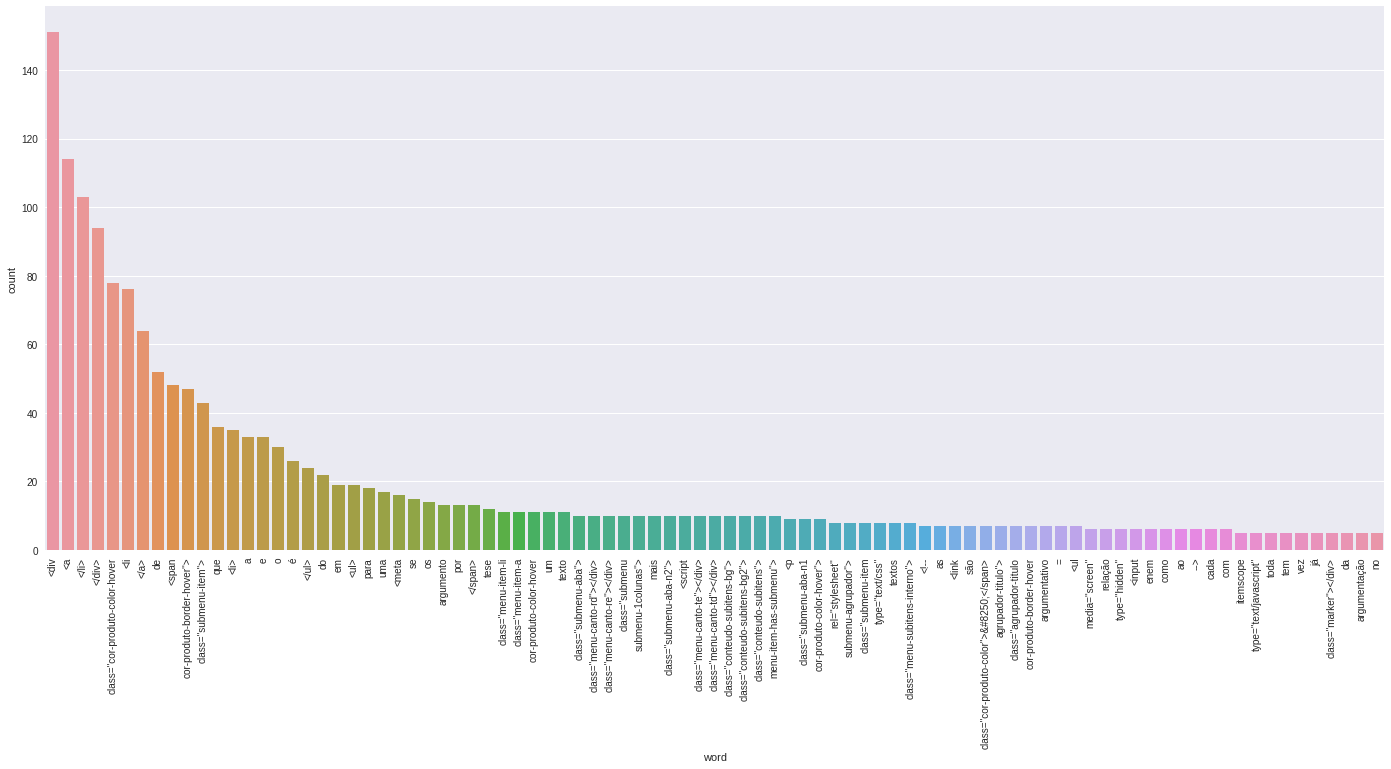

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()